<a href="https://colab.research.google.com/github/rtajeong/M3_new/blob/main/lab56_topic_modeling_rev8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSA (Latent Semantic Analysis)
- LDA (토픽 모델링) 에 아이디어 제공한 알고리즘
- DTM(document-term matrix) 나 TfIdf matrix 에 Truncated SVD 이용

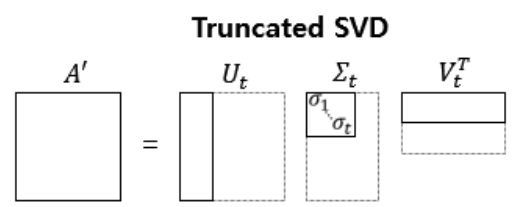

- example from https://wikidocs.net/24949

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

doc1 = "사과 먹고 싶다"
doc2 = "바나나 먹고 싶다"
doc3 = "길고 노란 바나나 바나나"
doc4 = "저는 과일이 좋아요"
corpus = np.array([doc1, doc2, doc3, doc4])
vec = CountVectorizer()
A = vec.fit_transform(corpus).toarray()
A

array([[0, 0, 0, 1, 0, 1, 1, 0, 0],
       [0, 0, 0, 1, 1, 0, 1, 0, 0],
       [0, 1, 1, 0, 2, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 1]])

In [ ]:
vec.get_feature_names_out()

array(['과일이', '길고', '노란', '먹고', '바나나', '사과', '싶다', '저는', '좋아요'],
      dtype=object)

In [ ]:
A.shape

(4, 9)

In [ ]:
U, s, VT = np.linalg.svd(A, full_matrices = True)
print('matrix U :')
print(U.round(2))

matrix U :
[[-0.24  0.75  0.   -0.62]
 [-0.51  0.44 -0.    0.74]
 [-0.83 -0.49 -0.   -0.27]
 [-0.   -0.    1.    0.  ]]


In [ ]:
print('singular vectors :')
print(s.round(2))

singular vectors :
[2.69 2.05 1.73 0.77]


In [ ]:
S = np.zeros((4,9))
S[:4, :4] = np.diag(s)
print(S.round(2))

[[2.69 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   2.05 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   1.73 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.77 0.   0.   0.   0.   0.  ]]


In [ ]:
print('matrix VT :')
print(VT.round(2))

matrix VT :
[[-0.   -0.31 -0.31 -0.28 -0.8  -0.09 -0.28 -0.   -0.  ]
 [ 0.   -0.24 -0.24  0.58 -0.26  0.37  0.58 -0.   -0.  ]
 [ 0.58 -0.    0.    0.   -0.    0.   -0.    0.58  0.58]
 [ 0.   -0.35 -0.35  0.16  0.25 -0.8   0.16 -0.   -0.  ]
 [-0.   -0.78 -0.01 -0.2   0.4   0.4  -0.2   0.    0.  ]
 [-0.29  0.31 -0.78 -0.24  0.23  0.23  0.01  0.14  0.14]
 [-0.29 -0.1   0.26 -0.59 -0.08 -0.08  0.66  0.14  0.14]
 [-0.5  -0.06  0.15  0.24 -0.05 -0.05 -0.19  0.75 -0.25]
 [-0.5  -0.06  0.15  0.24 -0.05 -0.05 -0.19 -0.25  0.75]]


In [ ]:
np.allclose(A, np.dot(np.dot(U,S), VT).round(2))

True

In [ ]:
# let's take the top 2 signular values. -> 2 topics
S = S[:2, :2]; S.round(2)

array([[2.69, 0.  ],
       [0.  , 2.05]])

In [ ]:
U = U[:, :2]; U.round(2)   # (4,2) -> 문서의 수 x 토픽의 수
                           # U의 각 행은 잠재 의미를 표현하기 위한 수치화 된 각각의 문서 벡터

array([[-0.24,  0.75],
       [-0.51,  0.44],
       [-0.83, -0.49],
       [-0.  , -0.  ]])

In [ ]:
VT = VT[:2, :]; VT.round(2)   # (2,9) -> 토픽의 수 x 단어의 갯수
                              # VT 의 각 열은 잠재 의미를 표현하기 위해 수치화된 각각의 단어 벡터

array([[-0.  , -0.31, -0.31, -0.28, -0.8 , -0.09, -0.28, -0.  , -0.  ],
       [ 0.  , -0.24, -0.24,  0.58, -0.26,  0.37,  0.58, -0.  , -0.  ]])

In [ ]:
A_prime = U @ S @ VT; A_prime.round(2)

array([[ 0.  , -0.17, -0.17,  1.08,  0.12,  0.62,  1.08, -0.  , -0.  ],
       [ 0.  ,  0.2 ,  0.2 ,  0.91,  0.86,  0.45,  0.91,  0.  ,  0.  ],
       [ 0.  ,  0.93,  0.93,  0.03,  2.05, -0.17,  0.03,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  , -0.  ,  0.  ,  0.  ,  0.  ]])

- it is a little different from the original matrix because of the truncation.

- Let's use the library function

In [ ]:
svd_model = TruncatedSVD(n_components=2, algorithm='randomized', n_iter=100, random_state=122)
svd_model.fit(A)
svd_model.components_.round(2)      # VT matrix

array([[-0.  ,  0.31,  0.31,  0.28,  0.8 ,  0.09,  0.28, -0.  , -0.  ],
       [ 0.  , -0.24, -0.24,  0.58, -0.26,  0.37,  0.58,  0.  ,  0.  ]])

In [ ]:
svd_model.singular_values_

array([2.68731789, 2.04508425])

## LSA (sklearn) with newsgroup data
  - Twenty Newsgroups이라고 불리는 20개의 다른 주제를 가진 뉴스그룹 데이터 (sklearn)
  - 문서의 수를 원하는 토픽의 수로 압축한 뒤에 각 토픽당 가장 중요한 단어 5개를 출력하는 실습으로 토픽 모델링을 수행

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation

In [ ]:
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data
print('샘플의 수 :',len(documents))

샘플의 수 : 11314


In [ ]:
dir(dataset)

['DESCR', 'data', 'filenames', 'target', 'target_names']

In [ ]:
dataset.target

array([17,  0, 17, ...,  9,  4,  9])

In [ ]:
dataset.target_names      #  20개의 뉴스그룹 카테고리

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
documents[0]

"Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe most pro-israeli media in the world. Having lived in Europe\nI realize that incidences such as the one described in the\nletter have occured. The U.S. media as a whole seem to try to\nignore them. The U.S. is subsidizing Israels existance and the\nEuropeans are not (at least not to the same degree). So I think\nthat might be a reason they report more clearly on the\natrocities.\n\tWhat is a shame is that in Austria, daily reports of\nthe inhuman acts commited by Israeli soldiers and the blessing\nreceived from the Government makes some of the Holocaust guilt\ngo away. After all, look how the Jews are treating other races\nwhen they got power. It is unfortunate.\n"

In [ ]:
pd.DataFrame({'document':documents})

,document
0,Well i'm not sure about the story nad it did s...
1,"\n\n\n\n\n\n\nYeah, do you expect people to re..."
2,Although I realize that principle is not one o...
3,Notwithstanding all the legitimate fuss about ...
4,"Well, I will have to change the scoring on my ..."
...,...
11309,"Danny Rubenstein, an Israeli journalist, will ..."
11310,\n
11311,\nI agree. Home runs off Clemens are always m...
11312,I used HP DeskJet with Orange Micros Grappler ...


In [ ]:
# text preprocessing
news_df = pd.DataFrame({'document':documents})
# 특수 문자 제거
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ")
# 길이가 3이하인 단어는 제거 (길이가 짧은 단어 제거)
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
# 전체 단어에 대한 소문자 변환
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

<ipython-input-24-f494c22217f3>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ")


In [ ]:
news_df['clean_doc'][0]

'well sure about story seem biased what disagree with your statement that media ruin israels reputation that rediculous media most israeli media world having lived europe realize that incidences such described letter have occured media whole seem ignore them subsidizing israels existance europeans least same degree think that might reason they report more clearly atrocities what shame that austria daily reports inhuman acts commited israeli soldiers blessing received from government makes some holocaust guilt away after look jews treating other races when they power unfortunate'

In [ ]:
# NLTK로부터 불용어를 받아와 제거한다.
nltk.download('stopwords')
stop_words = stopwords.words('english')
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split())   # split default - any whitespace
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
print(tokenized_doc[:2])

0    [well, sure, story, seem, biased, disagree, st...
1    [yeah, expect, people, read, actually, accept,...
Name: clean_doc, dtype: object


In [ ]:
# tf-idf matrix
detokenized_doc = []
for i in range(len(news_df)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

news_df['clean_doc'] = detokenized_doc

In [ ]:
news_df['clean_doc'][0]

'well sure story seem biased disagree statement media ruin israels reputation rediculous media israeli media world lived europe realize incidences described letter occured media whole seem ignore subsidizing israels existance europeans least degree think might reason report clearly atrocities shame austria daily reports inhuman acts commited israeli soldiers blessing received government makes holocaust guilt away look jews treating races power unfortunate'

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english',
                             max_features= 1000, # 상위 1,000개의 단어
                             max_df = 0.5,       # ignore terms of df higher than 0.5
                             smooth_idf=True)

X = vectorizer.fit_transform(news_df['clean_doc'])

print(X.shape)

(11314, 1000)


In [ ]:
# topic modeling
svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)
svd_model.fit(X)
len(svd_model.components_)   # VT matrix

20

In [ ]:
svd_model.singular_values_

array([16.67167987,  9.94427157,  8.20462457,  7.91491576,  7.62721822,
        7.32036744,  7.14917931,  6.91692712,  6.87091741,  6.73542917,
        6.63038827,  6.53307383,  6.49293858,  6.37442457,  6.23051145,
        6.18087881,  6.08341956,  5.98681284,  5.94837772,  5.90526352])

In [ ]:
np.shape(svd_model.components_)  # 정확하게 토픽의 수 t × 단어의 수의 크기를 가지고 있다.

(20, 1000)

- 각 20개의 행 (topics)에 대해 각 1,000개의 열 (words) 중 가장 값이 큰 5개의 값을 찾아서 단어로 출력.

In [ ]:
# first row 에 대해 먼저 확인
idx_5 = svd_model.components_[0].argsort()[-5:]
idx_5

array([365, 894, 626, 456, 481])

In [ ]:
[vectorizer.get_feature_names_out()[i] for i in idx_5][::-1]

['like', 'know', 'people', 'think', 'good']

In [ ]:
# 모든 row 에 대해 확인
terms = vectorizer.get_feature_names_out()       # 단어 집합. 1,000개의 단어가 저장됨.

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components, 1):
        # print("Topic %d:" % (idx), [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[:-n - 1:-1]])
        print("Topic %d:" % (idx), [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[-n:][::-1]])

get_topics(svd_model.components_, terms)

Topic 1: [('like', 0.21386), ('know', 0.20046), ('people', 0.19293), ('think', 0.17805), ('good', 0.15128)]
Topic 2: [('thanks', 0.32888), ('windows', 0.29088), ('card', 0.18069), ('drive', 0.17455), ('mail', 0.15111)]
Topic 3: [('game', 0.37064), ('team', 0.32443), ('year', 0.28154), ('games', 0.2537), ('season', 0.18419)]
Topic 4: [('drive', 0.53324), ('scsi', 0.20165), ('hard', 0.15628), ('disk', 0.15578), ('card', 0.13994)]
Topic 5: [('windows', 0.40399), ('file', 0.25436), ('window', 0.18044), ('files', 0.16078), ('program', 0.13894)]
Topic 6: [('chip', 0.16114), ('government', 0.16009), ('mail', 0.15625), ('space', 0.1507), ('information', 0.13562)]
Topic 7: [('like', 0.67086), ('bike', 0.14236), ('chip', 0.11169), ('know', 0.11139), ('sounds', 0.10371)]
Topic 8: [('card', 0.46633), ('video', 0.22137), ('sale', 0.21266), ('monitor', 0.15463), ('offer', 0.14643)]
Topic 9: [('know', 0.46047), ('card', 0.33605), ('chip', 0.17558), ('government', 0.1522), ('video', 0.14356)]
Topic 10

- Pros and Cons of LSA:
  - can be implemented easily and quickly.
  - good performance in calculating the similarity of documents as it can derive the potential meaning of word
  - But, if you add new data, you should recalculate it (difficult to update)
  - that is why word embedding (like Word2Vec) is in the spotlight.

## LDA in sklearn

In [ ]:
lda = LatentDirichletAllocation(n_components=20, learning_method="batch",
                                max_iter=100, random_state=0)

document_topics = lda.fit_transform(X)
len(lda.components_)

20

In [ ]:
lda.get_params()   # doc_topic_prior = alpha, topic_word_prior = beta
                   # both are by default 1/n_components

{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'batch',
 'learning_offset': 10.0,
 'max_doc_update_iter': 100,
 'max_iter': 100,
 'mean_change_tol': 0.001,
 'n_components': 20,
 'n_jobs': None,
 'perp_tol': 0.1,
 'random_state': 0,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}

In [ ]:
X.shape

(11314, 1000)

In [ ]:
np.shape(lda.components_)

(20, 1000)

In [ ]:
np.shape(document_topics)

(11314, 20)

In [ ]:
document_topics[0]  # document1 -> mixed multiple topics

array([0.43689302, 0.00993009, 0.00993009, 0.00993009, 0.00993009,
       0.00993009, 0.00993009, 0.00993009, 0.00993009, 0.00993009,
       0.00993009, 0.00993009, 0.00993009, 0.00993009, 0.00993009,
       0.3843653 , 0.00993009, 0.00993009, 0.00993009, 0.00993009])

In [ ]:
# 모든 row 에 대해 확인
get_topics(lda.components_, terms)

Topic 1: [('israel', 55.37531), ('israeli', 37.07113), ('jews', 34.14804), ('jewish', 30.62082), ('arab', 22.74232)]
Topic 2: [('david', 21.78632), ('michael', 20.14385), ('keyboard', 15.99996), ('hell', 11.85443), ('wife', 10.19585)]
Topic 3: [('armenian', 29.4585), ('armenians', 27.88309), ('turkish', 25.01496), ('turkey', 20.68642), ('greek', 15.39845)]
Topic 4: [('thanks', 84.69616), ('advance', 40.68202), ('mail', 37.54933), ('looking', 35.86392), ('info', 33.36252)]
Topic 5: [('sale', 61.28771), ('offer', 46.43454), ('bike', 44.62347), ('condition', 38.64548), ('shipping', 37.77755)]
Topic 6: [('windows', 98.96698), ('file', 88.71622), ('window', 72.59648), ('program', 72.05492), ('files', 71.72221)]
Topic 7: [('game', 64.33812), ('team', 59.51838), ('year', 48.0801), ('games', 37.10433), ('play', 35.982)]
Topic 8: [('drivers', 29.69715), ('printer', 28.6972), ('cards', 25.22757), ('print', 18.87286), ('yeah', 18.72474)]
Topic 9: [('games', 33.2758), ('game', 27.26833), ('year', 

- try to compare the results with the target

In [ ]:
dataset.target_names      #  20개의 뉴스그룹 카테고리

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

# LDA(Latent Dirichlet Allocation)
- gensim:
  - Topic Modeling Focus: designed for natural language processing and topic modeling. It is well-suited for text data and is optimized for large text corpora.
  - Incremental Training: it allows for incremental training of LDA models, which can be useful if you want to update your model over time without reprocessing the entire dataset.
  - Efficiency: known for its memory efficiency and scalability. It can handle very large text corpora efficiently.
  - Customization: provides more flexibility in customizing LDA parameters and fine-tuning the model to suit your specific needs.
- sklearn:
  - General Machine Learning Focus: Scikit-learn is a general-purpose machine learning library. Its LDA implementation is part of its broader suite of machine learning algorithms and is designed for general data analysis tasks.
  - Ease of Use: If you are already familiar with scikit-learn for other machine learning tasks, using scikit-learn's LDA can be convenient and consistent with your existing workflow.
  - Integration with Other Machine Learning Algorithms: Scikit-learn allows for easy integration of LDA with other machine learning techniques and provides a consistent API for various algorithms.

## Gensim LDA example
- LDA는 문서들은 토픽들의 혼합으로 구성되어져 있으며, 토픽들은 확률 분포에 기반하여 단어들을 생성한다고 가정.
- 데이터가 주어지면, LDA는 문서가 생성되던 과정을 역추적
- https://wikidocs.net/30708

- LDA algorithm:
  - (1) hyperparameter k is given
  - (2) assign all words to one of k topics
  - (3) iterate followings:
     - assume the word w is mis-assigned and all others are well- assigned
     - re-assign w based on:
        - p(topic t | document d) : 문서 d의 단어들 중 토픽 t에 해당하는 단어들의 비율
        - p(word w | topic t) : 각 토픽들 t에서 해당 단어 w의 분포
- LSA and LDA
  - LSA: DTM (document term matrix)을 차원 축소 하여 축소 차원에서 근접 단어들을 토픽으로 묶는다
  - LDA: 단어가 특정 토픽에 존재할 확률과 문서에 특정 토픽이 존재할 확률을 결합확률로 추정하여 토픽을 추출

In [ ]:
# let's use the same dataset as we used in LSA
print(tokenized_doc.shape)
tokenized_doc[:5]

(11314,)


0    [well, sure, story, seem, biased, disagree, st...
1    [yeah, expect, people, read, actually, accept,...
2    [although, realize, principle, strongest, poin...
3    [notwithstanding, legitimate, fuss, proposal, ...
4    [well, change, scoring, playoff, pool, unfortu...
Name: clean_doc, dtype: object

- record word frequency (word_id, word_freq)

In [ ]:
from gensim import corpora

dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[:2])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 4), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 2), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1)], [(52, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 2), (67, 1), (68, 1), (69, 1), (70, 1), (71, 2), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 2), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 2), (86, 1), (87, 1), (88, 1), (89, 1)]]


In [ ]:
# LDA train
import gensim

NUM_TOPICS = 20      # 20개의 토픽, k=20
# train the model
ldamodel = gensim.models.ldamodel.LdaModel(corpus,
                                           num_topics = NUM_TOPICS,
                                           id2word=dictionary,
                                           passes=15)      # no. of passes through the corpus during training.

topics = ldamodel.print_topics(num_words=5)  # 5 개의 단어만 출력
for topic in topics:
    print(topic)

(0, '0.016*"government" + 0.010*"public" + 0.009*"encryption" + 0.008*"security" + 0.006*"clipper"')
(1, '0.029*"game" + 0.028*"team" + 0.023*"year" + 0.021*"games" + 0.016*"season"')
(2, '0.015*"israel" + 0.009*"israeli" + 0.006*"jews" + 0.006*"arab" + 0.005*"would"')
(3, '0.016*"period" + 0.013*"play" + 0.009*"power" + 0.008*"goal" + 0.008*"detroit"')
(4, '0.030*"president" + 0.014*"jobs" + 0.010*"going" + 0.009*"said" + 0.009*"package"')
(5, '0.016*"unit" + 0.009*"bits" + 0.009*"picture" + 0.008*"serial" + 0.007*"compass"')
(6, '0.023*"would" + 0.016*"like" + 0.013*"know" + 0.012*"think" + 0.010*"good"')
(7, '0.011*"people" + 0.008*"would" + 0.006*"jesus" + 0.006*"many" + 0.006*"believe"')
(8, '0.025*"water" + 0.015*"insurance" + 0.015*"cubs" + 0.009*"outlets" + 0.009*"phillies"')
(9, '0.006*"power" + 0.006*"bike" + 0.006*"used" + 0.005*"high" + 0.004*"speed"')
(10, '0.021*"armenian" + 0.018*"turkish" + 0.016*"armenians" + 0.011*"turkey" + 0.010*"jews"')
(11, '0.009*"health" + 0.007

In [ ]:
# see the topics as a list of words
# - no natural ordering between the topics in LDA.

ldamodel.show_topics(num_topics=10, num_words=10, log=False, formatted=True)   # 10 개 단어 출력

[(15,
  '0.019*"drive" + 0.013*"card" + 0.012*"system" + 0.011*"disk" + 0.011*"scsi" + 0.010*"know" + 0.010*"anyone" + 0.010*"thanks" + 0.008*"would" + 0.008*"problem"'),
 (18,
  '0.011*"government" + 0.008*"encryption" + 0.008*"public" + 0.007*"security" + 0.007*"system" + 0.007*"chip" + 0.007*"keys" + 0.006*"clipper" + 0.006*"information" + 0.005*"used"'),
 (1,
  '0.011*"armenian" + 0.011*"jews" + 0.009*"turkish" + 0.008*"armenians" + 0.007*"world" + 0.006*"turkey" + 0.006*"jewish" + 0.006*"people" + 0.006*"history" + 0.005*"greek"'),
 (9,
  '0.022*"ground" + 0.021*"wire" + 0.014*"circuit" + 0.013*"neutral" + 0.012*"wiring" + 0.011*"panel" + 0.010*"voltage" + 0.010*"connected" + 0.009*"navy" + 0.009*"cable"'),
 (6,
  '0.011*"printer" + 0.007*"candida" + 0.006*"sabbath" + 0.006*"auto" + 0.006*"autos" + 0.005*"print" + 0.005*"laser" + 0.005*"points" + 0.004*"polygon" + 0.004*"prophecy"'),
 (7,
  '0.017*"available" + 0.013*"software" + 0.013*"mail" + 0.011*"information" + 0.010*"version

In [ ]:
ldamodel.print_topics(10)  # alias of show_topics (10 words per topic, by default)

[(17,
  '0.020*"gordon" + 0.019*"banks" + 0.019*"pitt" + 0.017*"soon" + 0.017*"surrender" + 0.017*"skepticism" + 0.015*"intellect" + 0.015*"shameful" + 0.015*"cadre" + 0.014*"chastity"'),
 (12,
  '0.013*"exist" + 0.012*"atheism" + 0.011*"atheists" + 0.010*"existence" + 0.008*"belief" + 0.008*"argument" + 0.008*"science" + 0.008*"atheist" + 0.007*"universe" + 0.007*"religious"'),
 (2,
  '0.020*"would" + 0.013*"people" + 0.011*"think" + 0.010*"like" + 0.009*"know" + 0.008*"even" + 0.007*"time" + 0.007*"well" + 0.007*"could" + 0.007*"much"'),
 (19,
  '0.016*"goal" + 0.016*"pittsburgh" + 0.012*"flames" + 0.012*"kings" + 0.012*"puck" + 0.011*"calgary" + 0.011*"play" + 0.010*"wings" + 0.009*"game" + 0.009*"quebec"'),
 (1,
  '0.011*"armenian" + 0.011*"jews" + 0.009*"turkish" + 0.008*"armenians" + 0.007*"world" + 0.006*"turkey" + 0.006*"jewish" + 0.006*"people" + 0.006*"history" + 0.005*"greek"'),
 (14,
  '0.009*"state" + 0.008*"states" + 0.008*"health" + 0.008*"guns" + 0.007*"control" + 0.006

- visualize LDA

In [ ]:
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 69.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 80.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 29.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.1.0 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.2 which is incompatible.
tensorflow 2.13.0 

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models  # Only needed if using gensim for LDA

pyLDAvis.enable_notebook()     # to enable the display in notebooks
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

BrokenProcessPool: ignored

- 문서 별 토픽 분포 보기

In [ ]:
len(ldamodel[corpus])

In [ ]:
ldamodel[corpus][0]

In [ ]:
for i, topic_list in enumerate(ldamodel[corpus]):
    if i==10:
        break
    print(i,'번째 문서의 topic 비율은',topic_list)

In [ ]:
ldamodel.per_word_topics

In [ ]:
ldamodel[corpus][0]

In [ ]:
doc = ldamodel[corpus][0]
doc = sorted(doc, key=lambda x: (x[1]), reverse=True) # topic ratio value 값으로 정렬
doc

In [ ]:
def make_topictable_per_doc(ldamodel, corpus):
    topic_table = pd.DataFrame()

    # 몇 번째 문서인지를 의미하는 문서 번호와 해당 문서의 토픽 비중을 한 줄씩 꺼내온다.
    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)
        # 각 문서에 대해서 비중이 높은 토픽순으로 토픽을 정렬한다.
        # EX) 정렬 전 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (10번 토픽, 5%), (12번 토픽, 21.5%),
        # Ex) 정렬 후 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (12번 토픽, 21.5%), (10번 토픽, 5%)
        # 48 > 25 > 21 > 5 순으로 정렬이 된 것.

        # 모든 문서에 대해서 각각 아래를 수행
        for j, (topic_num, prop_topic) in enumerate(doc): #  몇 번 토픽인지와 비중을 나눠서 저장한다.
            if j == 0:  # 정렬을 한 상태이므로 가장 앞에 있는 것이 가장 비중이 높은 토픽
                # topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
                new_data = pd.Series([int(topic_num), round(prop_topic,4), topic_list])
                # print(new_data)
                topic_table = pd.concat([topic_table, new_data.to_frame().T], ignore_index=True)
                # 가장 비중이 높은 토픽과, 가장 비중이 높은 토픽의 비중과, 전체 토픽의 비중을 저장한다.
            else:
                break
        # break
    return(topic_table)

In [ ]:
topictable = make_topictable_per_doc(ldamodel, corpus)
topictable.head()

In [ ]:
topictable = topictable.reset_index() # 문서 번호을 의미하는 열(column)로 사용하기 위해서 인덱스 열을 하나 더 만든다.
topictable.columns = ['문서 번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중', '각 토픽의 비중']
topictable[:10]

## Sklearn LDA - a simple example

In [ ]:
!pip install konlpy

In [ ]:
import konlpy
import numpy as np
import pandas as pd
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from konlpy.tag import Okt

In [ ]:
list_doc = ["나는 학교에 갑니다.",
      "우리는 학교에서 공부를 합니다.",
      "학교에서는 운동도 합니다.",
      "지금은 골프하기에 아주 좋은 날씨입니다.",
      "축구를 학교에서 시청하기도 합니다.",
      "공부를 열시히 해서 좋은 데이터 엔지니어가 될 것입니다.",
      "학교에서는 많은 친구를 사귑니다."]

okt = Okt()
results = []
for line in list_doc:
    word_list = okt.pos(line, norm=True, stem=True)
    words = []
    for word in word_list:
        if not word[1] in ["Josa", "eomi", "Punctuation", "Verb"]:
            words.append(word[0])
    words = (" ".join(words)).strip()
    results.append(words)


In [ ]:
results

In [ ]:
vect = CountVectorizer(max_features=10)
X = vect.fit_transform(results)

lda = LatentDirichletAllocation(n_components=5, learning_method="batch",
                                max_iter=25, random_state=0)

document_topics = lda.fit_transform(X)

In [ ]:
X.toarray().shape        # no_documents x no_words

In [ ]:
 document_topics.shape   # no_documents x no_topics

In [ ]:
lda.components_.shape    # no_topics x no_words

In [ ]:
lda.components_.round(2)    # no of topics x number of words

In [ ]:
feature_names = np.array(vect.get_feature_names_out())
N=7
for i in range(0, lda.components_.shape[0]):
    print ("topic {}:".format(i))
    topic_idx = lda.components_.argsort(axis=1)[:,::-1][i]
    print(topic_idx)
    topic_words = [topic_idx[j] for j in range(0,N)]
    print (feature_names[topic_words])

In [ ]:
import matplotlib.pyplot as plt
plt.bar(np.arange(5), np.sum(document_topics, axis=0), width=0.5)

## Sklearn LDA - Korean documents
- 한국어 기사 예제
- 주어진 문서의 주제(카테고리)를 구분 - 비지도 학습
- 빅카인즈 뉴스기사 데이터 활용(https://www.bigkinds.or.kr/)
- LDA(Latent Dirichlet Allocation) 사용하여 관련된 단어나 문서의 집합을 찾는다. 관련성이 높은 단어들이 발생하면 같은 토픽으로 분류.
- 각 문서들의 토픽들이 디리클레 분포를 따른다고 가정.
- 문서마다 토픽이 어떻게 분포되어 있는지, 그리고 토픽마다 단어의 분포가 어떻게 되어 있는지 파악, 토픽에 따라 단어의 분포를 결정하고 그 중 가장 확률이 높은 단어를 선택.
- LDA:
  - 말뭉치로부터 대표적인 토픽 선정
  - 해당 토픽으로부터 단어들을 뽑아 문서를 생성


In [ ]:
!pip install konlpy

In [ ]:
import konlpy
import numpy as np
import pandas as pd
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from konlpy.tag import Okt

In [ ]:
!wget https://bit.ly/2QA9xhg -O news_1500.xlsx

In [ ]:
df_train = pd.read_excel('news_1500.xlsx', names=['기사'],
                         keep_default_na=False) # no strings parsed as NaN values
#Countvectorizer적용을 위해 list로 변환
list_train = df_train['기사'].tolist()

In [ ]:
df_train.head(3)

In [ ]:
list_train[:5], len(list_train)

In [ ]:
okt = Okt()
results = []
for line in list_train:
    word_list = okt.pos(line, norm=True, stem=True)  # part of speech (품사)
    words = []
    for word in word_list:
        if not word[1] in ["Josa", "eomi", "Punctuation", "Verb"]:
            words.append(word[0])
    words = (" ".join(words)).strip()
    results.append(words)

In [ ]:
results[:5]

- LDA

In [ ]:
# max_df = 0.50 means "ignore terms that appear in more than 50% of the documents".
# max_df = 25 means "ignore terms that appear in more than 25 documents".

vect = CountVectorizer(max_features=10000, max_df=.10)
X = vect.fit_transform(results)

# n_components: number of topics
lda = LatentDirichletAllocation(n_components=10, learning_method="batch",
                                max_iter=25, random_state=0)

document_topics = lda.fit_transform(X)    # need to fit and transform in sklearn

In [ ]:
X.shape, document_topics.shape    # no_documents x no_topics

In [ ]:
document_topics[0]

- components_[i, j] can be viewed as pseudocount that represents the number of times (word j was assigned to topic i).
-  It can also be viewed as distribution over the words for each topic after normalization:

In [ ]:
lda.components_.shape     # no_topics x no_vocabularies

In [ ]:
lda.components_[0]

In [ ]:
lda.components_.argsort(axis=1)[:,::-1]

In [ ]:
# 토픽마다(components_의 행) 특성을 오름차순으로 정렬합니다
# 내림차순이 되도록 [:, ::-1] 사용해 행의 정렬을 반대로 바꿉니다
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]

# CountVectorizer 객체에서 특성 이름을 구합니다.
feature_names = np.array(vect.get_feature_names_out())

In [ ]:
N = 10 # number of words to print for each topic
for i in range(0, lda.components_.shape[0]):
    print ("topic {}:".format(i))
    topic_idx = lda.components_.argsort(axis=1)[:,::-1][i]
    topic_words = [topic_idx[j] for j in range(0,N)]
    print (feature_names[topic_words])

In [ ]:
### text 에 있는 포맷 (위와 동일한 정보) ###

%matplotlib inline
import matplotlib.pyplot as plt

def print_topics(topics, feature_names, sorting, topics_per_chunk=6, n_words=20):
    for i in range(0, len(topics), topics_per_chunk):
        # for each chunk:
        these_topics = topics[i: i + topics_per_chunk]
        # maybe we have less than topics_per_chunk left
        len_this_chunk = len(these_topics)
        # print topic headers
        print(("topic {:<8}" * len_this_chunk).format(*these_topics))
        print(("-------- {0:<5}" * len_this_chunk).format(""))
        # print top n_words frequent words
        for i in range(n_words):
            try:
                print(("{:<14}" * len_this_chunk).format(
                    *feature_names[sorting[these_topics, i]]))
            except:
                pass
        print("\n")


In [ ]:
print_topics(topics=range(10), feature_names=feature_names, sorting=sorting,
             topics_per_chunk=4, n_words=10)

In [ ]:
# 100개 토픽으로 학습
lda100 = LatentDirichletAllocation(n_components=100, learning_method="batch",
                                   max_iter=25, random_state=0)
document_topics100 = lda100.fit_transform(X)

In [ ]:
topics = np.array([7, 16, 24, 41, 45, 51, 54, 81, 89, 97])

In [ ]:
sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names_out())
print_topics(topics=topics, feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=10)

In [ ]:
document_topics100.shape

In [ ]:
np.argsort(document_topics100[:, 77])[::-1]

In [ ]:
# 관련 토픽 77를 가중치로 정렬
topic77 = np.argsort(document_topics100[:, 77])[::-1]

# 이 토픽이 가장 비중이 큰 문서 다섯개를 출력
for i in topic77[:5]:
    # 첫 두 문장을 출력합니다
    print(list_train[i], "\n")
    print("***")

In [ ]:
#한글 폰트 설치 (should restart the kernel after installing)

import matplotlib
!apt-get install fonts-nanum*
!apt-get install fontconfig
!fc-cache -fv
!cp /usr/share/fonts/truetype/nanum/Nanum* /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/
!rm -rf /content/.cache/matplotlib/*
import matplotlib.font_manager
matplotlib.font_manager._load_fontmanager(try_read_cache=False)
# matplotlib.font_manager._rebuild()


In [ ]:
import platform
from matplotlib import font_manager, rc

import matplotlib.pyplot as plt
import matplotlib

if platform.system() == 'Windows':
    path = "c:\Windows\Fonts\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
# 맥
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
# 리눅스
elif platform.system() == 'Linux':
    # rc('font', family='NanumBarunGothic')
    rc('font', family='NanumBarunGothic')
else:
    print('system error...')

In [ ]:
sorting

In [ ]:
feature_names.shape, feature_names[:10]

In [ ]:
feature_names[sorting[:, :2]].shape   # 각 topic 별 가장 많이 할당된 단어 2개씩

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = ["{:>2} ".format(i) + " ".join(words)
               for i, words in enumerate(feature_names[sorting[:, :2]])]

# 두 개의 열이 있는 막대 그래프
for col in [0, 1]:
    start = col * 50
    end = (col + 1) * 50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 100)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()

# Exercise

## string replacement

In [ ]:
# for reference
# in Pandas dataframes, it support regular expressions in the first argument.
# But, in regular Python strings, str.replace() method does not directly support regular expressions in its first argument.
# - you will have to use re.sub()

x = "aa kk3abb bc'cc cdddd"
print(x.replace("[^a-zA-Z]", " "))

import re

x2 = re.sub(r'[^a-zA-Z]', ' ', x)
print(x2)

df = pd.DataFrame(columns=['a'])

df['a'] = [x]
df['a'] = df['a'].str.replace("[^a-zA-Z]", " ", regex=True)  # default: True will change to False in the futue version.
df


## corpora.dictionary:
- it implements the concept of a Dictionary – a mapping between words and their integer ids.

In [ ]:
from gensim.corpora import Dictionary

texts = [['human', 'interface', 'computer', 'play'],
         ['men', 'data', 'science']]
dct = Dictionary(texts)  # initialize a Dictionary

In [ ]:
dct.token2id    # token -> token_id

In [ ]:
dct.add_documents([["cat", "say", "meow"],
                   ["dog", "say", "walwal"],
                   ['rabbit']])  # add more document (extend the vocabulary)
dct.token2id

In [ ]:
len(dct)

In [ ]:
# convert document into BoW format(id, counts)
dct.doc2bow(["dog", "play", "computer", "computer", "any_non_existent_word"])

## some python gramma exercises

In [ ]:
try:
    for i in range(5,-1,-1):
        print (5 // i)
except ZeroDivisionError:
    print("divide-by-zero error.")
finally:
    print("Done...")

In [ ]:
list(range(10,-1,-1))

In [ ]:
("{}").format(list(range(5)))

In [ ]:
("{}").format(*range(5))

In [ ]:
("{}" * 5).format(*range(5))

In [ ]:
("{:<5}" * 5).format(*range(5))

In [ ]:
a = [1,2,3]
print(a)
print(*a)

In [ ]:
d = {"A":12, "B": 56}
print(d)
print(*d)

## Dirichlet distribution
- can be seen as a multivariate generalization of a Beta distribution

- (Example) [Wikipedia] this distribution can be used if one wanted to cut strings (each of initial length 1.0) into K pieces with different lengths, where each piece had a designated average length (on average), but allowing some variation in the relative sizes of the pieces.
- Let's draw some samples from Dirichlet distribution based on some belief.
- **alpha**: Higher alpha values concentrate the distribution more around the mean, while lower alpha values result in a more spread-out distribution

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

alpha = (10, 10, 10)       # your belief

s = np.random.dirichlet(alpha, 20).transpose()
print('average length per class:', s.mean(axis=1))

plt.barh(range(20), s[0])
plt.barh(range(20), s[1], left=s[0], color='g')
plt.barh(range(20), s[2], left=s[0]+s[1], color='r')
plt.title("Lengths of Strings")
plt.plot()

In [ ]:
alpha = (6, 3, 1)       # your belief

s = np.random.dirichlet(alpha, 20).transpose()
print('average length per class:', s.mean(axis=1))

plt.barh(range(20), s[0])
plt.barh(range(20), s[1], left=s[0], color='g')
plt.barh(range(20), s[2], left=s[0]+s[1], color='r')
plt.title("Lengths of Strings")
plt.plot()

- Let's plot the distribution of samples.
  - The distribution of each class or category in a Dirichlet distribution is not normally distributed.
  - The Dirichlet distribution is appropriate for modeling probabilities or proportions in a constrained space.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the parameters (alpha values)
alpha = [6, 3, 1]             # your belief

num_samples = 100000           # Number of samples to generate

# Generate multiple random samples from the Dirichlet distribution
samples = np.random.dirichlet(alpha, size=num_samples)
print('average length per class:', samples.mean(axis=0))

# Plot the distribution of samples
plt.figure(figsize=(5, 3))

# For each category, create a histogram
sns.displot(samples, kde=True)

plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Dirichlet Samples')
plt.legend()
plt.show()


In [ ]:
labels = ['class 1', 'class 2', 'class 3']
plt.boxplot(samples, labels=labels)
plt.legend()

In [ ]:
num_samples = 100000           # Number of samples to generate
alphas = [[1,1,1], [50,50,50], [1,5,10], [10,50,100]]
samples = np.random.dirichlet(alphas[0], size=num_samples)
sns.displot(samples, kde=True)

In [ ]:
num_samples = 100000           # Number of samples to generate
alphas = [[1,1,1], [50,50,50], [1,5,10], [10,50,100]]

samples = np.random.dirichlet(alphas[1], size=num_samples)
plt.figure(figsize=(4,4))
sns.displot(samples, kde=True)

In [ ]:
samples = np.random.dirichlet(alphas[2], size=num_samples)
plt.figure(figsize=(4,4))
sns.displot(samples, kde=True)

- nice Visualization of the Drichlet Distribution
  - https://blog.bogatron.net/blog/2014/02/02/visualizing-dirichlet-distributions/

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
AREA = 0.5 * 1 * 0.75**0.5
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

In [ ]:
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

plt.figure(figsize=(8, 4))
for (i, mesh) in enumerate((triangle, trimesh)):
    plt.subplot(1, 2, i+ 1)
    plt.triplot(mesh)
    plt.axis('off')
    plt.axis('equal')

In [ ]:
# For each corner of the triangle, the pair of other corners
pairs = [corners[np.roll(range(3), -i)[1:]] for i in range(3)]
# The area of the triangle formed by point xy and another pair or points
tri_area = lambda xy, pair: 0.5 * np.linalg.norm(np.cross(*(pair - xy)))

def xy2bc(xy, tol=1.e-4):
    '''Converts 2D Cartesian coordinates to barycentric.'''
    coords = np.array([tri_area(xy, p) for p in pairs]) / AREA
    return np.clip(coords, tol, 1.0 - tol)

In [ ]:
class Dirichlet(object):
    def __init__(self, alpha):
        from math import gamma
        from operator import mul
        self._alpha = np.array(alpha)
        self._coef = gamma(np.sum(self._alpha)) / \
                           np.multiply.reduce([gamma(a) for a in self._alpha])
    def pdf(self, x):
        '''Returns pdf value for `x`.'''
        from operator import mul
        return self._coef * np.multiply.reduce([xx ** (aa - 1)
                                               for (xx, aa)in zip(x, self._alpha)])

In [ ]:
def draw_pdf_contours(dist, nlevels=200, subdiv=8, **kwargs):
    import math

    refiner = tri.UniformTriRefiner(triangle)
    trimesh = refiner.refine_triangulation(subdiv=subdiv)
    pvals = [dist.pdf(xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]

    plt.tricontourf(trimesh, pvals, nlevels, cmap='jet', **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')

In [ ]:
draw_pdf_contours(Dirichlet([1, 1, 1]))

In [ ]:
draw_pdf_contours(Dirichlet([0.999, 0.999, 0.999]))

In [ ]:
draw_pdf_contours(Dirichlet([5, 5, 5]))

In [ ]:
draw_pdf_contours(Dirichlet([50, 50, 50]))

In [ ]:
draw_pdf_contours(Dirichlet([6, 3, 1]))

In [ ]:
draw_pdf_contours(Dirichlet([10, 1, 1]))